In [1]:
%run lab1.ipynb

RuntimeError: This event loop is already running

RuntimeError: This event loop is already running

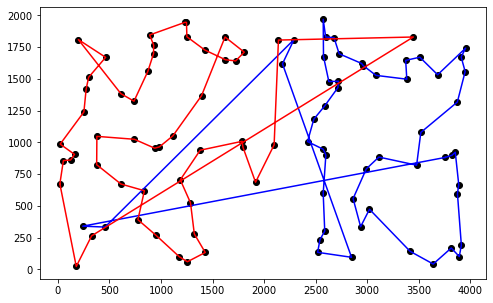

File:  kroA100.tsp 
Heuristic:  greedy_near 
Path lenght: 33108.46083771714


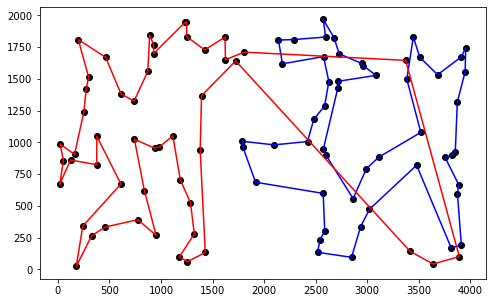

File:  kroA100.tsp 
Heuristic:  greedy_cycle 
Path lenght: 29667.75494131132


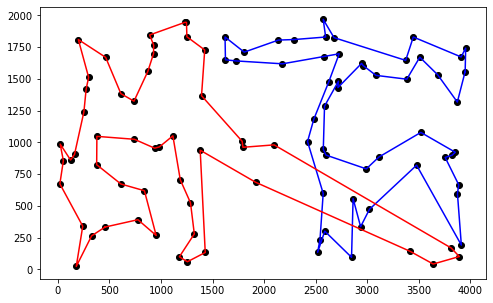

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 28453.01317239363


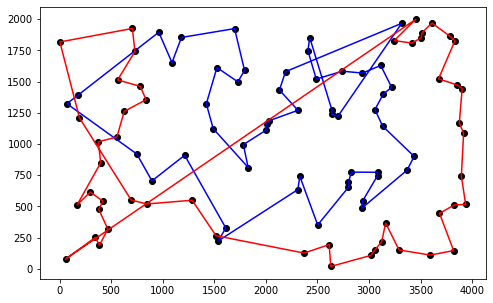

File:  kroB100.tsp 
Heuristic:  greedy_near 
Path lenght: 31351.85732090696


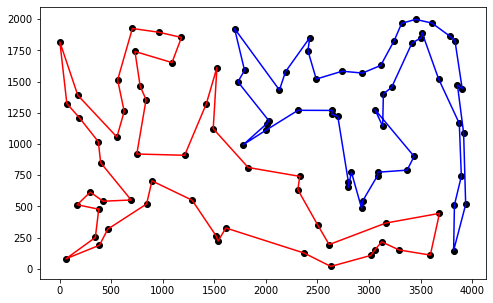

File:  kroB100.tsp 
Heuristic:  greedy_cycle 
Path lenght: 27961.075403173927


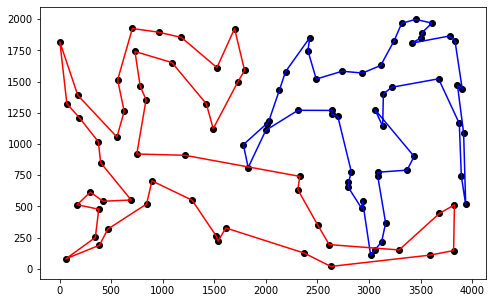

File:  kroB100.tsp 
Heuristic:  regreat_method 
Path lenght: 28276.61743962975


In [2]:
from scipy.spatial import distance
for file in ['kroA100.tsp', 'kroB100.tsp']:
    points = load_file(file)
    distances = get_distances(points)
    for heuristic in [greedy_near, greedy_cycle, regreat_method]:
        cycle1, cycle2 = heuristic(points, distances)
        heuristic_name = [name for name in globals() if globals()[name] is heuristic][0]
        draw_path(points, cycle1, cycle2, file + "_" + heuristic_name + ".jpg")
        print("File: ", file, "\nHeuristic: ", heuristic_name,
              "\nPath lenght:", cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2))

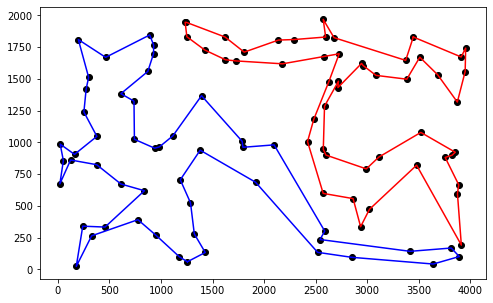

File:  kroA100.tsp 
Heuristic:  random 
Path lenght: 27576.24702475734


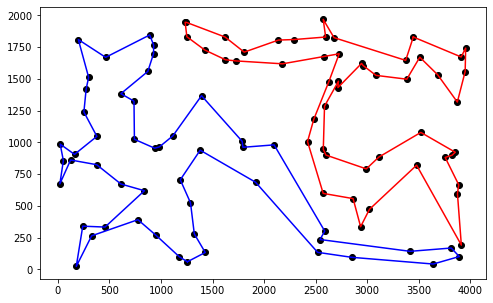

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27576.24702475734


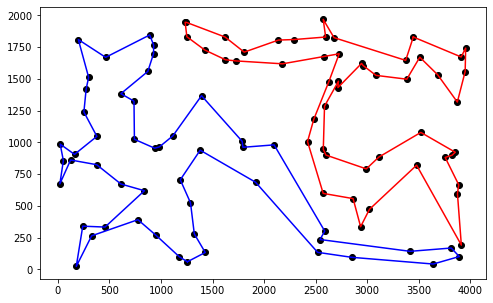

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27576.24702475734


In [3]:
def change_vertices(cycle1, cycle2, i, j, distance):
    l1 = len(cycle1)
    l2 = len(cycle2)
    c1 = cycle1.copy()
    c2 = cycle2.copy()
    inx, inx1, inx0 = c1[i], c1[(i - 1)%l1], c1[(i + 1)%l1]
    jnx, jnx1, jnx0 = c2[j], c2[(j - 1)%l2], c2[(j + 1)%l2]
    d1 = distance[inx][inx1] + distance[inx][inx0] + distance[jnx][jnx0] + distance[jnx][jnx1]
    d2 = distance[jnx][inx1] + distance[jnx][inx0] + distance[inx][jnx0] + distance[inx][jnx1]
    c1[i], c2[j] = c2[j], c1[i]
    return c1, c2, d1 - d2  

points = load_file('kroA100.tsp')
distances = get_distances(points)
cycle1, cycle2 = regreat_method(points, distances)
draw_path(points, cycle1, cycle2, "123.jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", "random",
      "\nPath lenght:", cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2))
    

path = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
cycle_new1, cycle_new2 = cycle1.copy(), cycle2.copy()

def greedy_outer_vertexy(cycle_copy, cycle1, cycle2):
    deltha = 0
    while(len(cycle_copy)):
        a = np.random.choice(cycle_copy, size=1, replace = False)
        index = np.where(cycle_copy == a)[0][0]
        cycle_copy = np.delete(cycle_copy, index)
        for i in range(len(cycle2)): 
            c1, c2, d = change_vertices(cycle1, cycle2, index, i, distances)
            if d > 0.0:
                return c1, c2
    return [], []

def steepest_outer_vertexy(cycle_copy, cycle1, cycle2):
    deltha = 0.0
    c1_ret, c2_ret = [], []
    while(len(cycle_copy)):
        a = np.random.choice(cycle_copy, size=1, replace = False)
        index = np.where(cycle_copy == a)[0][0]
        cycle_copy = np.delete(cycle_copy, index)
        for i in range(len(cycle2)): 
            c1, c2, d = change_vertices(cycle1, cycle2, index, i, distances)
            if d > deltha:
                deltha = d
                c1_ret, c2_ret = c1, c2
    return c1_ret, c2_ret

def greedy_outer(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle_copy = np.array(cycle_new1.copy())
        c1, c2 = greedy_outer_vertexy(cycle_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2
    return cycle_new1_ret, cycle_new2_ret

def steepest_outer(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle_copy = np.array(cycle_new1.copy())
        c1, c2 = steepest_outer_vertexy(cycle_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2
    return cycle_new1_ret, cycle_new2_ret
    
a, b = greedy_outer(cycle_new1, cycle_new2)
draw_path(points, a, b, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, a) + cycle_lenght(distances, b))
c, d = steepest_outer(cycle_new1, cycle_new2)

draw_path(points, c, d, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, c) + cycle_lenght(distances, d))    

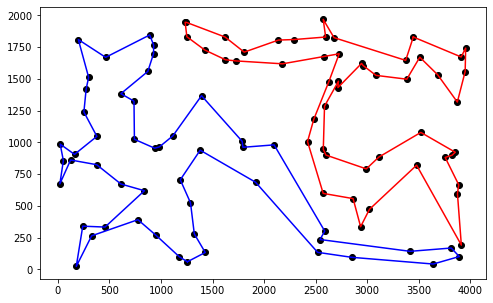

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27576.24702475734


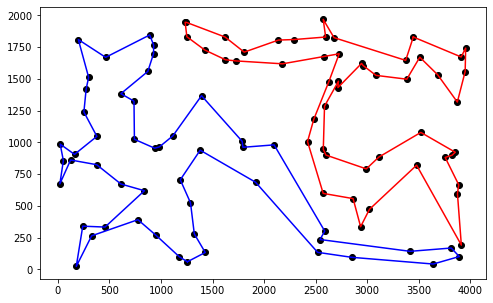

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27576.24702475734


In [4]:
def change_vertices_inside(cycle1, i, j, distance):
    if(abs(i-j) == 1):
        return [], 0.0
    l1 = len(cycle1)
    c1 = cycle1.copy()
    inx, inx1, inx0 = c1[i], c1[(i - 1)%l1], c1[(i + 1)%l1]
    jnx, jnx1, jnx0 = c1[j], c1[(j - 1)%l1], c1[(j + 1)%l1]
    d1 = distance[inx][inx1] + distance[inx][inx0] + distance[jnx][jnx0] + distance[jnx][jnx1]
    d2 = distance[jnx][inx1] + distance[jnx][inx0] + distance[inx][jnx0] + distance[inx][jnx1]
    c1[i], c1[j] = c1[j], c1[i]
    return c1, d1 - d2

import random 
def greedy_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_vertices_inside(return_arrays[ind], index, i, distances)
            if d > 0.0:
                return_arrays[ind] = c1
                return return_arrays
    return [], []


def steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    c1_ret, c2_ret = [], []
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_vertices_inside(return_arrays[ind], index, i, distances)
            if d > deltha:
                deltha = d
                return_arrays[ind] = c1
                c1_ret, c2_ret = return_arrays
    return c1_ret, c2_ret


cycle_new1, cycle_new2 = cycle1.copy(), cycle2.copy()

def greedy_inner_ver(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = greedy_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2   
    return cycle_new1_ret, cycle_new2_ret

e, f = greedy_inner_ver(cycle_new1, cycle_new2)
draw_path(points, e, f, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, e) + cycle_lenght(distances, f))

def steepest_inner_ver(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2   
    return cycle_new1_ret, cycle_new2_ret

g, h = steepest_inner_ver(cycle_new1, cycle_new2)
draw_path(points, g, h, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, g) + cycle_lenght(distances, h))    

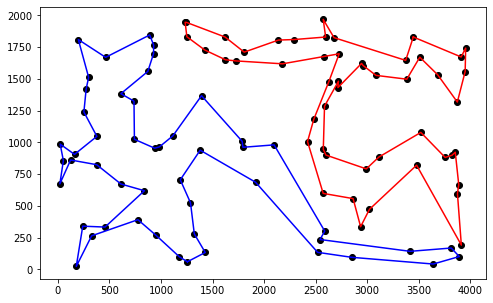

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27521.12735337786


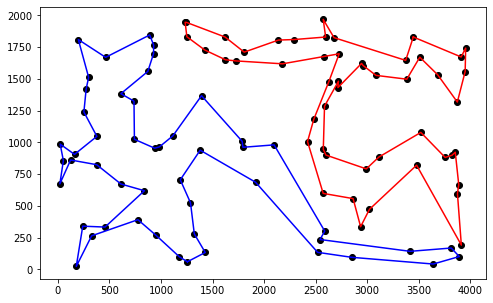

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27521.12735337786


In [5]:
def change_edges_inside(cycle, i, j, distance):
    if(abs(i-j) <= 2 or abs(i-j) > 49):
        return [], 0.0
    if i > j:
        i, j = j, i
    l1 = len(cycle)
    c1 = cycle.copy()
    inx, inx1 = c1[i], c1[(i + 1)%l1]
    jnx, jnx1 = c1[j], c1[(j + 1)%l1]
    d1 = distance[inx][inx1] + distance[jnx][jnx1]
    d2 = distance[inx][jnx] + distance[jnx1][inx1]
    c1[(i + 1)%l1 + 1:j] = c1[(i + 1)%l1 + 1:j][::-1]
    c1[(i + 1)%l1], c1[j] = c1[j], c1[(i + 1)%l1]
    return c1, d1 - d2


def greedy_inner_edges(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_edges_inside(return_arrays[ind], index, i, distances)
            if d > 0.0:
                return_arrays[ind] = c1
                return return_arrays
    return [], []

def steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    c1_ret, c2_ret = [], []
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_edges_inside(return_arrays[ind], index, i, distances)
            if d > deltha:
                deltha = d
                return_arrays[ind] = c1
                c1_ret, c2_ret = return_arrays
    return c1_ret, c2_ret

def greedy_inner_edg(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = greedy_inner_edges(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2  
    return cycle_new1_ret, cycle_new2_ret

i, j = greedy_inner_edg(cycle_new1, cycle_new2)
draw_path(points, i, j, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, i) + cycle_lenght(distances, j))


def steepest_inner_edg(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1, c2 = steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1 == []:
            break
        cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1, c2
    return cycle_new1_ret, cycle_new2_ret

k, l = steepest_inner_edg(cycle_new1, cycle_new2)
draw_path(points, k, l, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, k) + cycle_lenght(distances, l))

In [91]:
def random_solution(points, distances):
    cycle1, cycle2 = [], []  
    remaining = list(range(len(points)))
    
    while len(remaining) > 0:
        for cycle in [cycle1, cycle2]:
            random_point = random.choice(remaining)
            cycle.append(random_point)
            remaining.remove(random_point)
            
    return cycle1, cycle2

def random_walk(cycle1, cycle2):

    best_len = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
    best_cycle1 = cycle1.copy()
    best_cycle2 = cycle2.copy()
    start_time = time.time()
    
    while time.time() - start_time < 0.2:
        p1 = np.random.randint(0, len(cycle1))
        p2 = np.random.randint(0, len(cycle2))
        cycle1, cycle2, _ = change_vertices(cycle1, cycle2, p1, p2, distances)
        if cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2) < best_len:
            best_cycle1 = cycle1.copy()
            best_cycle2 = cycle2.copy()
            best_len = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
              
    return best_cycle1, best_cycle2

0
10
20
30
40
50
60
70
80
90
('random_walk', 'kroA100.tsp') 23998.855996872047


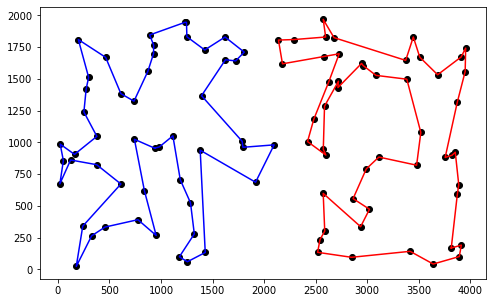

('none', 'kroA100.tsp') 23998.855996872047


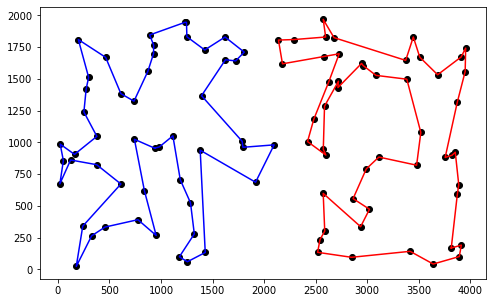

('greedy_outer', 'kroA100.tsp') 23998.855996872047


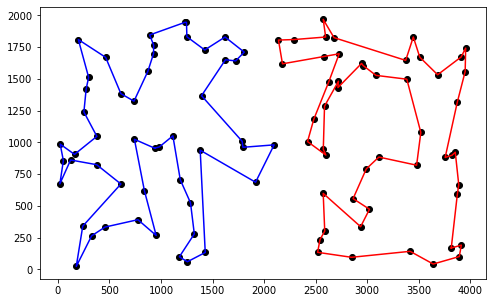

('steepest_outer', 'kroA100.tsp') 23998.855996872047


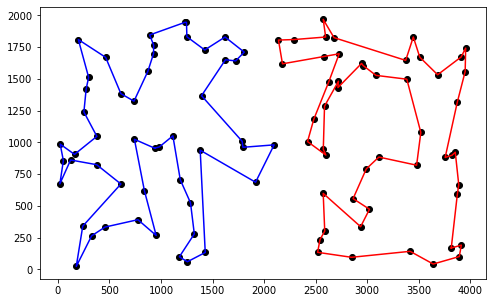

('greedy_inner_ver', 'kroA100.tsp') 23900.113536496698


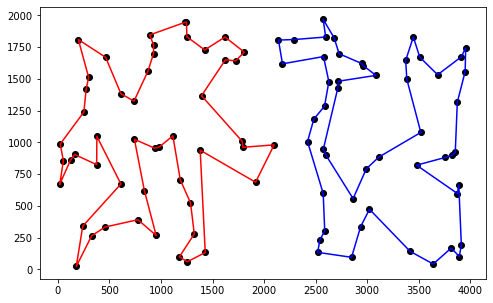

('steepest_inner_ver', 'kroA100.tsp') 23386.46888620739


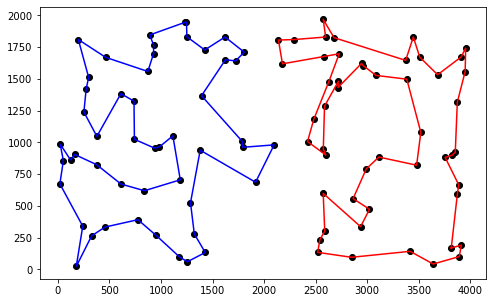

('greedy_inner_edg', 'kroA100.tsp') 23246.85131164984


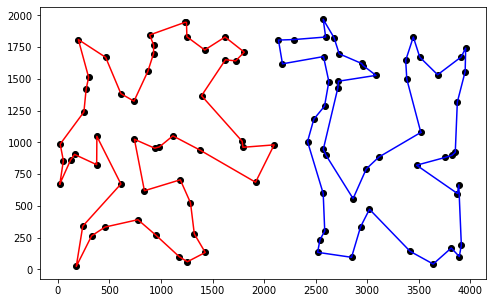

('steepest_inner_edg', 'kroA100.tsp') 23386.46888620739


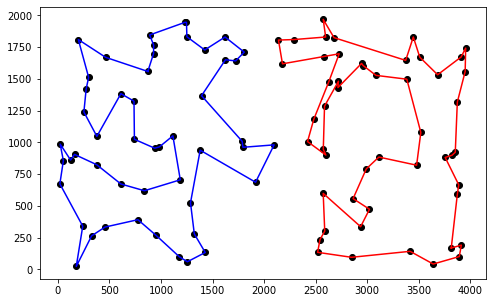

('random_walk', 'kroB100.tsp') 25120.61320596798


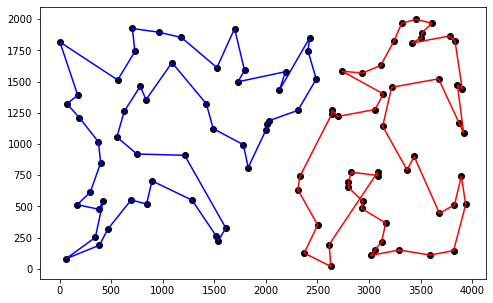

('none', 'kroB100.tsp') 25120.61320596798


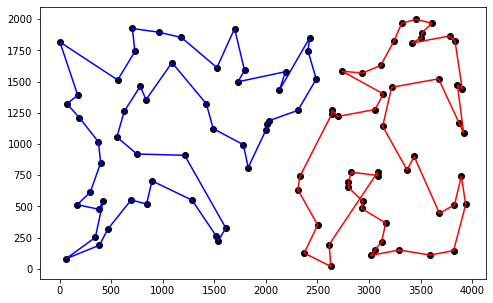

('greedy_outer', 'kroB100.tsp') 25120.61320596798


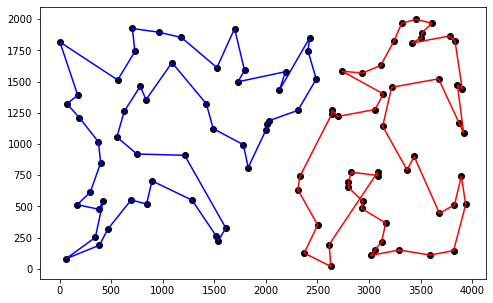

('steepest_outer', 'kroB100.tsp') 25120.61320596798


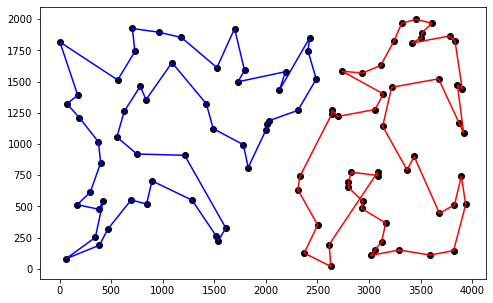

('greedy_inner_ver', 'kroB100.tsp') 25044.51155422328


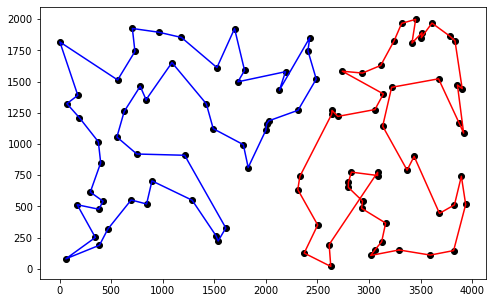

('steepest_inner_ver', 'kroB100.tsp') 24316.277220658587


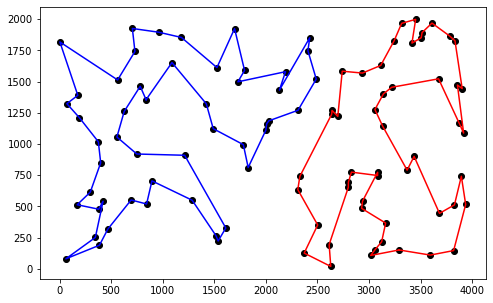

('greedy_inner_edg', 'kroB100.tsp') 24304.26255210065


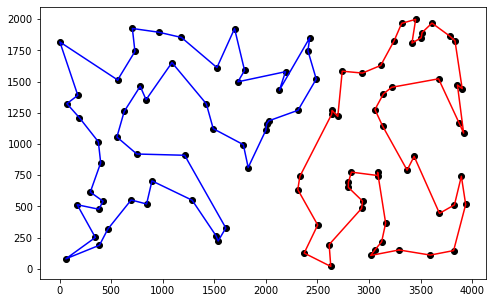

('steepest_inner_edg', 'kroB100.tsp') 24313.98937187509


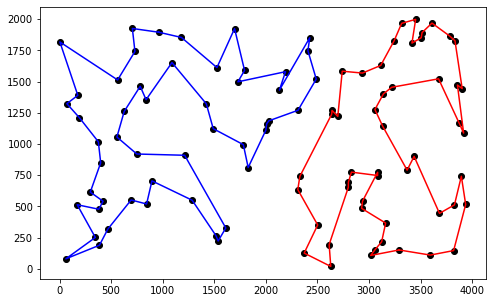

,random_walk,none,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg,random_walk,none,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg
,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,27376.270943,27376.270943,27013.649410,26937.312519,27275.886058,27003.029458,27006.615964,27008.690300,27944.496407,27944.496407,27755.242380,27725.017718,27862.053206,27214.452966,27281.709390,27219.726594
std,1678.456765,1678.456765,1614.410557,1601.386184,1662.372043,1654.526659,1660.007207,1656.448635,1220.372544,1220.372544,1123.507780,1074.234225,1204.546096,1180.412958,1167.489458,1247.328274
min,23998.855997,23998.855997,23998.855997,23998.855997,23900.113536,23386.468886,23246.851312,23386.468886,25120.613206,25120.613206,25120.613206,25120.613206,25044.511554,24316.277221,24304.262552,24313.989372
25%,26288.231029,26288.231029,25246.411817,25246.411817,25795.384913,25680.854084,25548.276110,25441.281251,27211.703148,27211.703148,27211.703148,27211.703148,27211.131185,26614.171926,26707.060595,26556.079129
50%,28153.684925,28153.684925,27612.111784,27576.247025,28100.851356,27876.623211,27856.786679,27869.109584,28017.459590,28017.459590,27910.250725,27832.610344,27922.726059,27263.310934,27236.692690,27369.669421
75%,28453.013172,28453.013172,28387.072376,28121.401948,28344.693422,28194.464780,28186.848163,28191.199291,28859.746242,28859.746242,28332.559456,28332.559456,28414.675418,27884.969428,27992.277554,27926.958516
max,30189.625596,30189.625596,29275.765705,29408.701184,30127.346875,28776.763984,28699.874587,28610.346718,30557.649393,30557.649393,30557.649393,30111.817714,30557.649393,30142.004708,29625.161905,29961.830466


In [98]:
import time

results = {
    ('random_walk' , 'kroA100.tsp') : [],
    ('none', 'kroA100.tsp')  : [],
    ('greedy_outer', 'kroA100.tsp')  : [],
    ('steepest_outer', 'kroA100.tsp') : [],
    ('greedy_inner_ver', 'kroA100.tsp'): [],
    ('steepest_inner_ver', 'kroA100.tsp')  : [],
    ('greedy_inner_edg', 'kroA100.tsp') : [],
    ('steepest_inner_edg', 'kroA100.tsp'): [], 
    ('random_walk', 'kroB100.tsp')  : [],
    ('none', 'kroB100.tsp')  : [],
    ('greedy_outer', 'kroB100.tsp')  : [],
    ('steepest_outer', 'kroB100.tsp') : [],
    ('greedy_inner_ver', 'kroB100.tsp'): [],
    ('steepest_inner_ver', 'kroB100.tsp')  : [],
    ('greedy_inner_edg', 'kroB100.tsp') : [],
    ('steepest_inner_edg', 'kroB100.tsp'): [], 
}

time_val = {
    ('random_walk', 'kroA100.tsp') : [],
    ('greedy_outer', 'kroA100.tsp')  : [],
    ('steepest_outer', 'kroA100.tsp') : [],
    ('greedy_inner_ver', 'kroA100.tsp'): [],
    ('steepest_inner_ver', 'kroA100.tsp')  : [],
    ('greedy_inner_edg', 'kroA100.tsp') : [],
    ('steepest_inner_edg', 'kroA100.tsp'): [], 
    ('random_walk', 'kroB100.tsp') :  [],
    ('greedy_outer', 'kroB100.tsp')  : [],
    ('steepest_outer', 'kroB100.tsp') : [],
    ('greedy_inner_ver', 'kroB100.tsp'): [],
    ('steepest_inner_ver', 'kroB100.tsp')  : [],
    ('greedy_inner_edg', 'kroB100.tsp') : [],
    ('steepest_inner_edg', 'kroB100.tsp'): [], 
}

min_cycles = {
    ('random_walk', 'kroA100.tsp')  : [None, None],
    ('none', 'kroA100.tsp')  : [None, None],
    ('greedy_outer', 'kroA100.tsp')  : [None, None],
    ('steepest_outer', 'kroA100.tsp') : [None, None],
    ('greedy_inner_ver', 'kroA100.tsp'): [None, None],
    ('steepest_inner_ver', 'kroA100.tsp')  : [None, None],
    ('greedy_inner_edg', 'kroA100.tsp') : [None, None],
    ('steepest_inner_edg', 'kroA100.tsp'): [None, None],
    ('random_walk', 'kroB100.tsp')  : [None, None],
    ('none', 'kroB100.tsp')  : [None, None], 
    ('greedy_outer', 'kroB100.tsp')  : [None, None],
    ('steepest_outer', 'kroB100.tsp') : [None, None],
    ('greedy_inner_ver', 'kroB100.tsp'): [None, None],
    ('steepest_inner_ver', 'kroB100.tsp')  : [None, None],
    ('greedy_inner_edg', 'kroB100.tsp') : [None, None],
    ('steepest_inner_edg', 'kroB100.tsp'): [None, None], 
}

for x in range(100):
    if x % 10 == 0: 
        print(x)
    for file in ['kroA100.tsp', 'kroB100.tsp']:
        points = load_file(file)
        distances = get_distances(points)
        
        for heuristic in [regreat_method]:
                
            cycle1, cycle2 = heuristic(points, distances)
            c_len = cycle_lenght(distances, cycle1) + cycle_lenght(distances, cycle2)
            results[('none', file)].append(c_len)  

            if min_cycles[('none', file)][0] is None or min_cycles[('none', file)][0] > c_len:
                    min_cycles[('none', file)][0] = c_len
                    min_cycles[('none', file)][1] = [cycle1, cycle2]
                
            for met in [greedy_outer, steepest_outer, greedy_inner_ver, steepest_inner_ver,
                        greedy_inner_edg, steepest_inner_edg, random_walk]:
                met_name = [name for name in globals() if globals()[name] is met][0]
                c1_copy, c2_copy = cycle1.copy(), cycle2.copy()
                start = time.time()
                c1, c2 = met(c1_copy, c2_copy)
                end = time.time()
                cycles_len = cycle_lenght(distances, c1) + cycle_lenght(distances, c2)
                if min_cycles[(met_name, file)][0] is None or min_cycles[(met_name, file)][0] > cycles_len:
                    min_cycles[(met_name, file)][0] = cycles_len
                    min_cycles[(met_name, file)][1] = [c1, c2]
                results[(met_name, file)].append(cycles_len)
                time_val[(met_name, file)].append(end-start)
for key, value in min_cycles.items():
    print(key, value[0])
    draw_path(load_file(key[1]), value[1][0], value[1][1], key[1] + "_" + key[0] + ".jpg")
pd.DataFrame(results).describe()     

In [96]:
pd.DataFrame(time_val).describe()  

,random_walk,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg,random_walk,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg
,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,0.201599,0.161377,1.183416,0.165747,0.653247,0.147963,0.653691,0.201863,0.160547,1.125182,0.163976,0.636339,0.150714,0.647411
std,0.001608,0.082192,0.610929,0.077608,0.290494,0.073089,0.312152,0.001569,0.086775,0.608303,0.076403,0.290239,0.074902,0.296780
min,0.200000,0.076007,0.480601,0.082569,0.364015,0.071997,0.365661,0.200000,0.075960,0.462618,0.079999,0.404001,0.092461,0.392742
25%,0.200036,0.110087,0.871529,0.118965,0.491857,0.105882,0.489310,0.200200,0.107991,0.781039,0.116004,0.483069,0.110893,0.499999
50%,0.201044,0.131402,0.991231,0.139977,0.544127,0.123998,0.532017,0.202006,0.133968,0.921778,0.136332,0.522630,0.124038,0.537611
75%,0.203391,0.177683,1.181888,0.172725,0.630587,0.144015,0.610298,0.203380,0.165474,1.141357,0.187331,0.587218,0.141734,0.595970
max,0.204002,0.478811,3.111581,0.454407,1.710687,0.388350,1.628101,0.204699,0.564259,3.855453,0.448615,1.488487,0.448844,1.536551


('random_walk', 'kroA100.tsp') 152429.44264764438


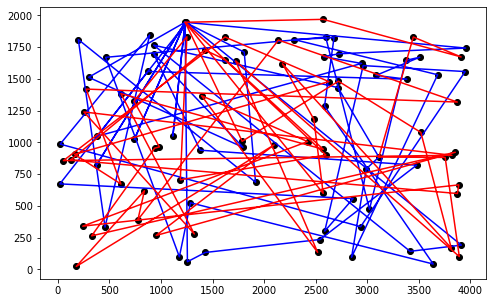

('none', 'kroA100.tsp') 152681.23933629645


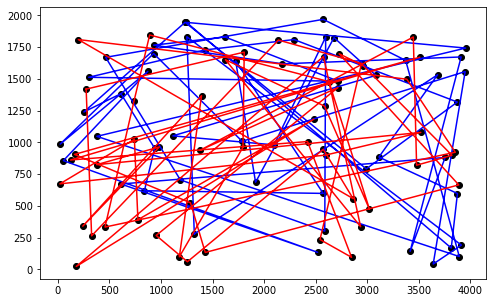

('greedy_outer', 'kroA100.tsp') 42595.527631550314


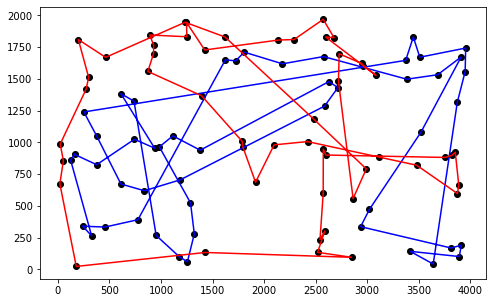

('steepest_outer', 'kroA100.tsp') 45995.5567923104


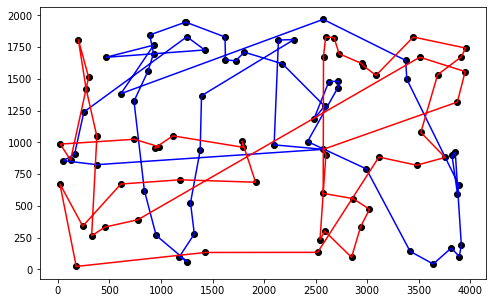

('greedy_inner_ver', 'kroA100.tsp') 46078.68071040262


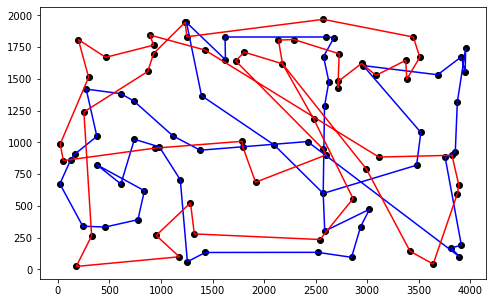

('steepest_inner_ver', 'kroA100.tsp') 34054.44220479299


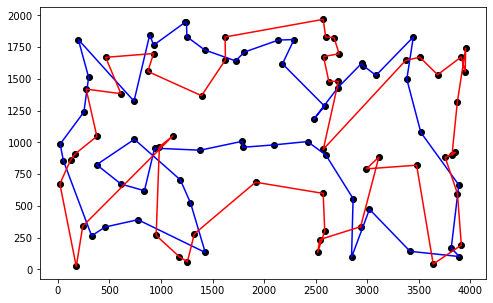

('greedy_inner_edg', 'kroA100.tsp') 33630.679581341625


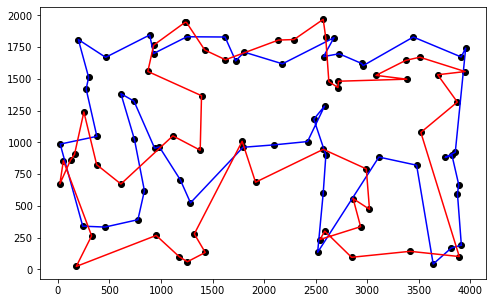

('steepest_inner_edg', 'kroA100.tsp') 33304.11221341793


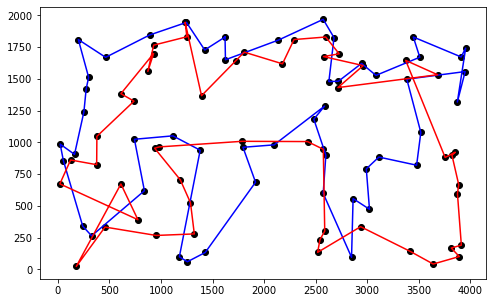

('random_walk', 'kroB100.tsp') 147093.34556174092


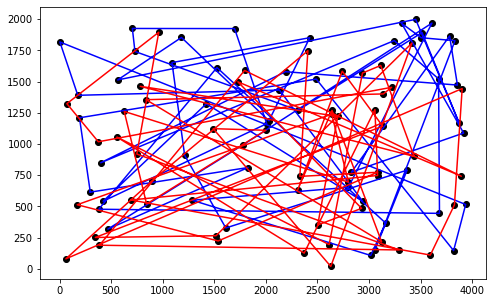

('none', 'kroB100.tsp') 152152.4921798171


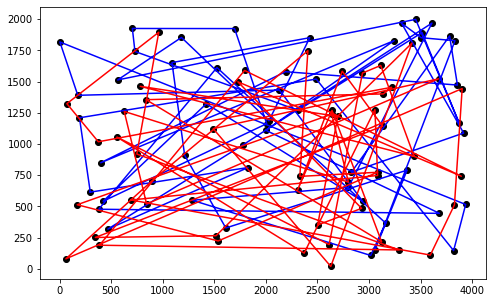

('greedy_outer', 'kroB100.tsp') 42571.36551245618


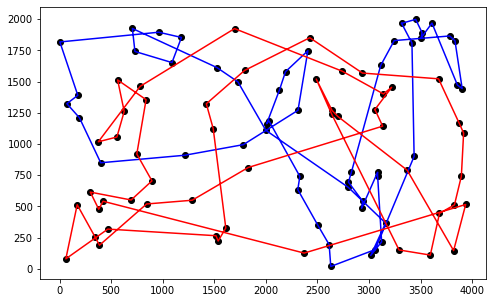

('steepest_outer', 'kroB100.tsp') 43752.21870499471


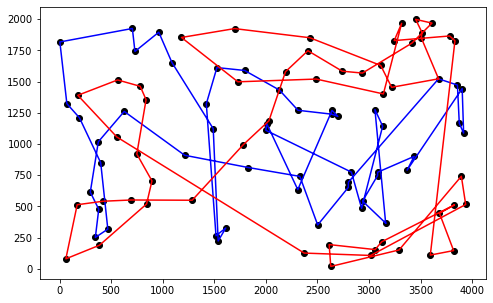

('greedy_inner_ver', 'kroB100.tsp') 45913.33921821506


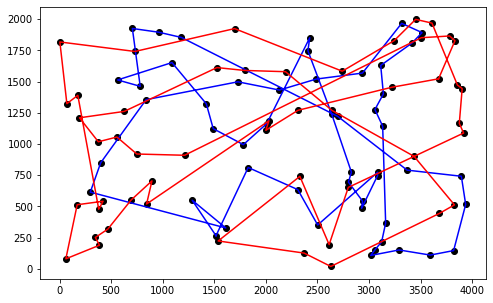

('steepest_inner_ver', 'kroB100.tsp') 33939.49976561985


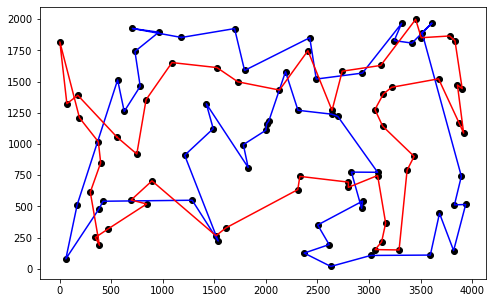

('greedy_inner_edg', 'kroB100.tsp') 32784.466100552396


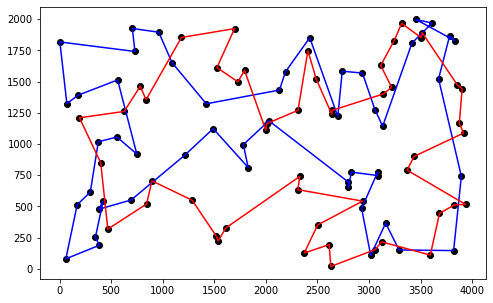

('steepest_inner_edg', 'kroB100.tsp') 33910.170876568576


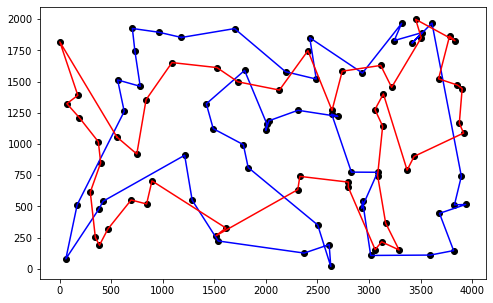

,random_walk,none,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg,random_walk,none,greedy_outer,steepest_outer,greedy_inner_ver,steepest_inner_ver,greedy_inner_edg,steepest_inner_edg
,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroA100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp,kroB100.tsp
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,168958.186654,171662.418769,50671.041758,56606.823360,55436.429831,37712.240525,37351.042508,37714.185410,165958.867253,169315.534515,51228.903763,56889.215566,55014.468157,37934.521647,37256.751809,37807.285606
std,8612.774191,9034.671281,3714.101707,5859.683775,3715.707794,1661.280253,1539.373506,1628.246141,7198.013456,6997.072304,3978.414396,5011.107866,3588.765727,1477.821446,1312.102232,1589.176431
min,152429.442648,152681.239336,42595.527632,45995.556792,46078.680710,34054.442205,33630.679581,33304.112213,147093.345562,152152.492180,42571.365512,43752.218705,45913.339218,33939.499766,32784.466101,33910.170877
25%,162429.266081,165595.931211,48357.770291,52417.393597,52901.672208,36658.670160,36345.921005,36649.496192,161582.675441,165250.622529,48490.324721,53495.487514,52482.346656,36941.448547,36391.521889,36758.093076
50%,168719.656068,171685.567933,50318.068637,55548.176566,55259.193611,37647.472128,37476.495328,37906.251812,165384.538591,168828.408644,50937.512893,56624.278479,55159.395264,37756.440326,37302.012077,37771.287531
75%,174951.152684,176584.068526,52893.808702,60187.902619,57654.213491,38853.584857,38436.989052,38788.631751,170845.513836,173026.318250,53393.639219,59615.117110,57467.284640,38853.355270,38062.108383,38755.175094
max,187750.790437,195038.644052,62772.106995,74227.522747,64298.019586,42507.858258,40687.777766,41753.117579,181548.531225,186886.900530,62923.960045,72133.146363,63360.046471,43273.299980,40942.399230,41651.822179


In [97]:
for key, value in min_cycles.items():
    print(key, value[0])
    draw_path(load_file(key[1]), value[1][0], value[1][1], key[1] + "_" + key[0] + ".jpg")
pd.DataFrame(results).describe()  

# Update

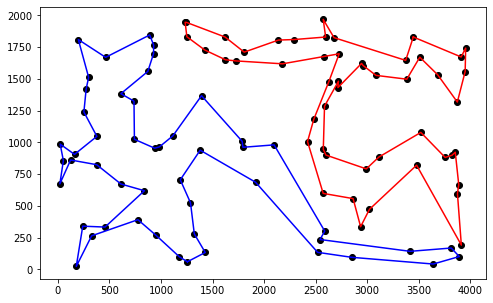

File:  kroA100.tsp 
Heuristic:  regreat_method 
Path lenght: 27521.12735337786


In [7]:
def change_vertices(cycle1, cycle2, i, j, distance):
    l1 = len(cycle1)
    l2 = len(cycle2)
    c1 = cycle1.copy()
    c2 = cycle2.copy()
    inx, inx1, inx0 = c1[i], c1[(i - 1)%l1], c1[(i + 1)%l1]
    jnx, jnx1, jnx0 = c2[j], c2[(j - 1)%l2], c2[(j + 1)%l2]
    d1 = distance[inx][inx1] + distance[inx][inx0] + distance[jnx][jnx0] + distance[jnx][jnx1]
    d2 = distance[jnx][inx1] + distance[jnx][inx0] + distance[inx][jnx0] + distance[inx][jnx1]
    c1[i], c2[j] = c2[j], c1[i]
    return c1, c2, d1 - d2  

def change_edges_inside(cycle, i, j, distance):
    if(abs(i-j) <= 2 or abs(i-j) > 49):
        return [], 0.0
    if i > j:
        i, j = j, i
    l1 = len(cycle)
    c1 = cycle.copy()
    inx, inx1 = c1[i], c1[(i + 1)%l1]
    jnx, jnx1 = c1[j], c1[(j + 1)%l1]
    d1 = distance[inx][inx1] + distance[jnx][jnx1]
    d2 = distance[inx][jnx] + distance[jnx1][inx1]
    c1[(i + 1)%l1 + 1:j] = c1[(i + 1)%l1 + 1:j][::-1]
    c1[(i + 1)%l1], c1[j] = c1[j], c1[(i + 1)%l1]
    return c1, d1 - d2

def steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle1, cycle2):
    deltha = 0
    choose = [cycle1_copy, cycle2_copy]
    return_arrays = [cycle1.copy(), cycle2.copy()]
    choose_array = [0, 1]
    c1_ret, c2_ret = [], []
    while(len(choose_array)):
        if len(choose) == 2:
            ind = random.choice(choose_array)
        if len(choose) == 1:
            ind = 0
        if len(choose[ind]) == 0:
            choose_array.remove(ind)
            continue
        a = np.random.choice(choose[ind], size=1, replace = False)
        index = np.where(choose[ind] == a)[0][0]
        choose[ind] = np.delete(choose[ind], index)
        for i in range(len(choose[ind])): 
            if choose[ind][i] == a:
                continue
            c1, d = change_edges_inside(return_arrays[ind], index, i, distances)
            if d > deltha:
                deltha = d
                return_arrays[ind] = c1
                c1_ret, c2_ret = return_arrays
    return c1_ret, c2_ret, deltha

def steepest_outer_vertexy(cycle_copy, cycle1, cycle2):
    deltha = 0.0
    c1_ret, c2_ret = [], []
    while(len(cycle_copy)):
        a = np.random.choice(cycle_copy, size=1, replace = False)
        index = np.where(cycle_copy == a)[0][0]
        cycle_copy = np.delete(cycle_copy, index)
        for i in range(len(cycle2)): 
            c1, c2, d = change_vertices(cycle1, cycle2, index, i, distances)
            if d > deltha:
                deltha = d
                c1_ret, c2_ret = c1, c2
    return c1_ret, c2_ret, deltha


def steepest(cycle_new1, cycle_new2):
    cycle_new1_ret, cycle_new2_ret = cycle_new1.copy(), cycle_new2.copy()
    while(True):
        cycle_copy = np.array(cycle_new1.copy())
        c1_1, c2_1, d1 = steepest_outer_vertexy(cycle_copy, cycle_new1, cycle_new2)
        cycle1_copy = np.array(cycle_new1.copy())
        cycle2_copy = np.array(cycle_new2.copy())
        c1_2, c2_2, d2 = steepest_inner_vertexy(cycle1_copy, cycle2_copy, cycle_new1, cycle_new2)
        if c1_1 == [] and c2_2 == []:
            break
        if d1 > d2:
            cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1_1, c2_1
        else:
            cycle_new1_ret, cycle_new2_ret = cycle_new1, cycle_new2 = c1_2, c2_2
    return cycle_new1_ret, cycle_new2_ret


points = load_file('kroA100.tsp')
distances = get_distances(points)
cycle1, cycle2 = regreat_method(points, distances)

a, b = steepest(cycle_new1, cycle_new2)
draw_path(points, a, b, file + "_" + heuristic_name + ".jpg")
print("File: ", 'kroA100.tsp', "\nHeuristic: ", heuristic_name,
      "\nPath lenght:", cycle_lenght(distances, k) + cycle_lenght(distances, l))